In [15]:
# Imported Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Better Visuals
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# encoding is used because exported CSV file from Power BI is not UTF-8 encoded
df = pd.read_csv('C:/Users/gandh/Downloads/HR_Data.csv', encoding='ISO-8859-1')
df.head()


,Employee ID,Name,Gender,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility,PerformanceGroup,TrainingGroup
0,108201,Nitara Saha,Female,Sales,Sales Executive,77,70.93,9401.00%,4.2,96.69,53,4.1,8,No,Medium,Low
1,137227,Kashvi Chana,Female,Sales,Sales Executive,80,73.94,8352.00%,4.2,85.29,43,3.7,4,No,Medium,Low
2,399562,Lagan Bajwa,Female,Sales,Sales Executive,72,74.95,8663.00%,3.0,88.10,50,3.3,22,No,Medium,Medium
3,174649,Chirag Vasa,Female,Sales,Sales Executive,83,74.01,8197.00%,3.4,86.90,38,3.5,8,No,Medium,Low
4,774763,Jhanvi Mahal,Female,Sales,Sales Executive,87,75.97,8378.00%,3.1,87.26,46,3.7,9,No,High,Low


#### Basic Data Overview


In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5000, 16)


In [4]:
print("\nColumn names:\n", df.columns)


Column names:
 Index(['Employee ID', 'Name', 'Gender', 'Department', 'Job Role',
       'Performance Score', 'KPI Score', 'Attendance (%)', 'Peer Rating',
       'Task Completion (%)', 'Work Hours Logged', 'Manager Feedback',
       'Training Hours', 'Promotion Eligibility', 'PerformanceGroup',
       'TrainingGroup'],
      dtype='object')


In [5]:
print("\nData Types:\n", df.dtypes)



Data Types:
 Employee ID                int64
Name                      object
Gender                    object
Department                object
Job Role                  object
Performance Score          int64
KPI Score                float64
Attendance (%)            object
Peer Rating              float64
Task Completion (%)      float64
Work Hours Logged          int64
Manager Feedback         float64
Training Hours             int64
Promotion Eligibility     object
PerformanceGroup          object
TrainingGroup             object
dtype: object


In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Employee ID              0
Name                     0
Gender                   0
Department               0
Job Role                 0
Performance Score        0
KPI Score                0
Attendance (%)           0
Peer Rating              0
Task Completion (%)      0
Work Hours Logged        0
Manager Feedback         0
Training Hours           0
Promotion Eligibility    0
PerformanceGroup         0
TrainingGroup            0
dtype: int64


#### Summary Statistics

In [10]:
 # Gives summary for both numerical and categorical
df.describe(include='all') 

,Employee ID,Name,Gender,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility,PerformanceGroup,TrainingGroup
count,5000.000000,5000,5000,5000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000
unique,NaN,4863,2,5,15,NaN,NaN,2172,NaN,NaN,NaN,NaN,NaN,2,3,2
top,NaN,Dhruv Sankaran,Male,Sales,Accountant,NaN,NaN,8085.00%,NaN,NaN,NaN,NaN,NaN,No,Medium,Low
freq,NaN,3,2504,1035,355,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,4305,2465,3219
mean,554223.243400,NaN,NaN,NaN,NaN,74.779400,77.384996,NaN,4.000080,84.978782,44.929800,4.001500,14.876800,NaN,NaN,NaN
std,261672.832133,NaN,NaN,NaN,NaN,14.666211,10.157152,NaN,0.580889,8.696399,5.961106,0.579257,9.005523,NaN,NaN,NaN
min,100021.000000,NaN,NaN,NaN,NaN,50.000000,60.010000,NaN,3.000000,70.010000,35.000000,3.000000,0.000000,NaN,NaN,NaN
25%,324261.250000,NaN,NaN,NaN,NaN,62.000000,68.327500,NaN,3.500000,77.317500,40.000000,3.500000,7.000000,NaN,NaN,NaN
50%,556827.500000,NaN,NaN,NaN,NaN,75.000000,77.340000,NaN,4.000000,85.125000,45.000000,4.000000,15.000000,NaN,NaN,NaN
75%,780774.500000,NaN,NaN,NaN,NaN,87.000000,86.050000,NaN,4.500000,92.472500,50.000000,4.500000,23.000000,NaN,NaN,NaN


#### Data Cleaning

In [18]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Clean 'Attendance (%)' column: remove %, convert to float
df['Attendance (%)'] = df['Attendance (%)'].astype(str).str.replace('%', '', regex=False)
df['Attendance (%)'] = pd.to_numeric(df['Attendance (%)'], errors='coerce')

# Convert 'Task Completion (%)' to float (already numeric, so wrap in to_numeric)
df['Task Completion (%)'] = pd.to_numeric(df['Task Completion (%)'], errors='coerce')

# Convert 'KPI Score' to numeric and fill missing with mean
df['KPI Score'] = pd.to_numeric(df['KPI Score'], errors='coerce')
df['KPI Score'] = df['KPI Score'].fillna(df['KPI Score'].mean())


In [16]:
print(df['Attendance (%)'].dtype)


float64


#### Descriptive Statistics

In [19]:
# Summary statistics for numeric columns
df.describe()


,Employee ID,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,554223.243400,74.779400,77.384996,8746.672000,4.000080,84.978782,44.929800,4.001500,14.876800
std,261672.832133,14.666211,10.157152,723.082713,0.580889,8.696399,5.961106,0.579257,9.005523
min,100021.000000,50.000000,60.010000,7501.000000,3.000000,70.010000,35.000000,3.000000,0.000000
25%,324261.250000,62.000000,68.327500,8113.000000,3.500000,77.317500,40.000000,3.500000,7.000000
50%,556827.500000,75.000000,77.340000,8741.500000,4.000000,85.125000,45.000000,4.000000,15.000000
75%,780774.500000,87.000000,86.050000,9375.250000,4.500000,92.472500,50.000000,4.500000,23.000000
max,999957.000000,100.000000,94.990000,10000.000000,5.000000,100.000000,55.000000,5.000000,30.000000


#### --> Distribution of Performance Score(Distribution Plot)

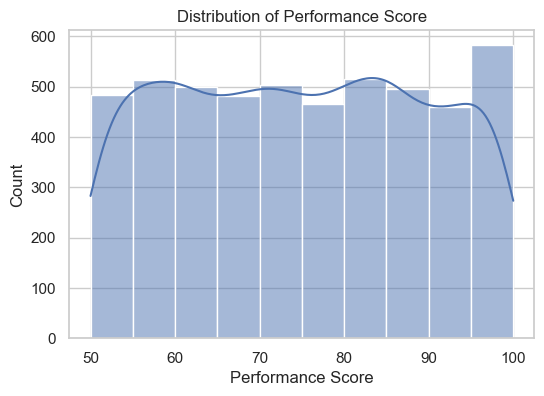

In [21]:
# Understand how performance scores are distributed among employees

plt.figure(figsize=(6,4))
sns.histplot(df['Performance Score'], bins=10, kde=True)
plt.title('Distribution of Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()


#### --> Employee Count by Department(Count Plot)

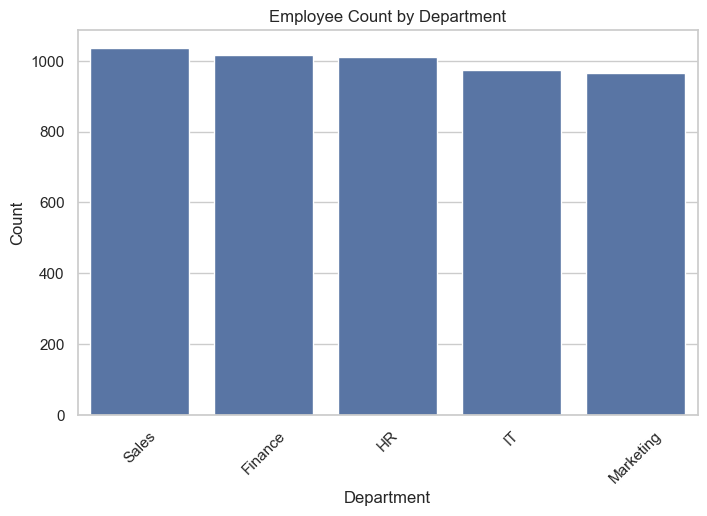

In [22]:
# It shows how employees are distributed across departments
plt.figure(figsize=(8,5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Employee Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### --> KPI Score by Department (Boxplot)

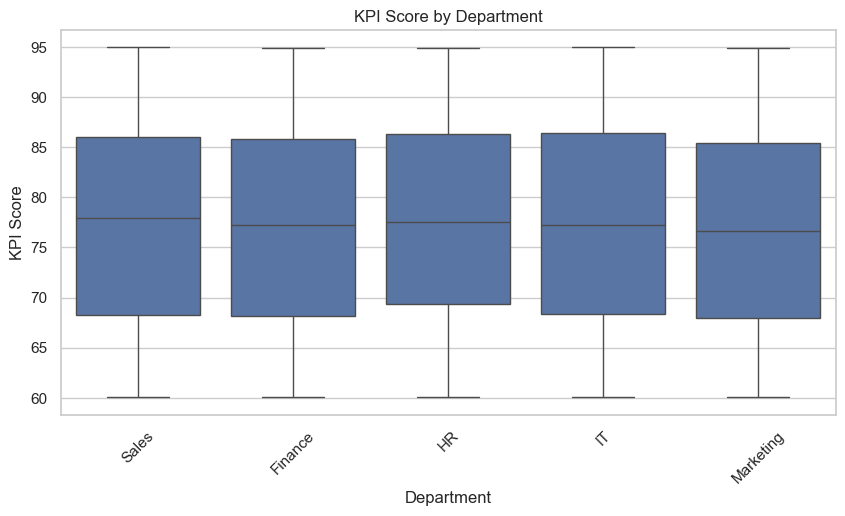

In [24]:
# To understand variation in KPI score across departments
plt.figure(figsize=(10,5))
sns.boxplot(x='Department', y='KPI Score', data=df)
plt.title('KPI Score by Department')
plt.xlabel('Department')
plt.ylabel('KPI Score')
plt.xticks(rotation=45)
plt.show()


#### --> Correlation Heatmap

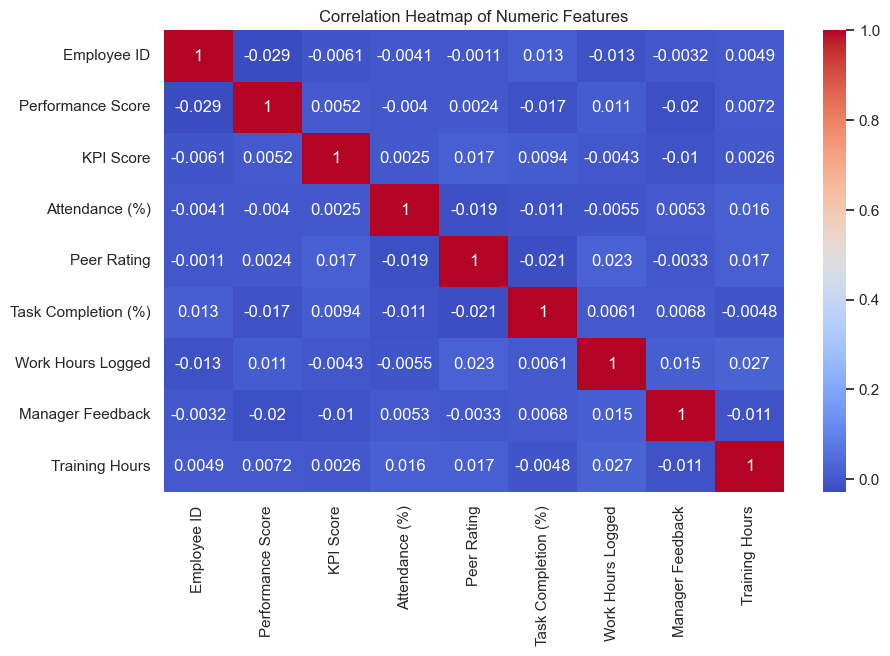

In [25]:
# To Check which numerical features are correlated.

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### 🔍 Missing Values Check


Missing Values:
 Employee ID              0
Name                     0
Gender                   0
Department               0
Job Role                 0
Performance Score        0
KPI Score                0
Attendance (%)           0
Peer Rating              0
Task Completion (%)      0
Work Hours Logged        0
Manager Feedback         0
Training Hours           0
Promotion Eligibility    0
PerformanceGroup         0
TrainingGroup            0
dtype: int64


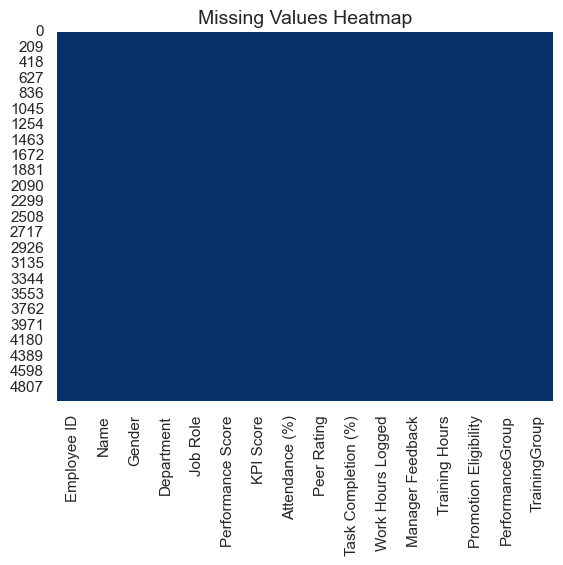

In [11]:
print("\nMissing Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap="Blues_r")
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


### 🔁 Duplicate Rows Check

In [12]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


### 📊 Summary Statistics

In [13]:
df.describe(include='all')

,Employee ID,Name,Gender,Department,Job Role,Performance Score,KPI Score,Attendance (%),Peer Rating,Task Completion (%),Work Hours Logged,Manager Feedback,Training Hours,Promotion Eligibility,PerformanceGroup,TrainingGroup
count,5000.000000,5000,5000,5000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000
unique,NaN,4863,2,5,15,NaN,NaN,2172,NaN,NaN,NaN,NaN,NaN,2,3,2
top,NaN,Dhruv Sankaran,Male,Sales,Accountant,NaN,NaN,8085.00%,NaN,NaN,NaN,NaN,NaN,No,Medium,Low
freq,NaN,3,2504,1035,355,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,4305,2465,3219
mean,554223.243400,NaN,NaN,NaN,NaN,74.779400,77.384996,NaN,4.000080,84.978782,44.929800,4.001500,14.876800,NaN,NaN,NaN
std,261672.832133,NaN,NaN,NaN,NaN,14.666211,10.157152,NaN,0.580889,8.696399,5.961106,0.579257,9.005523,NaN,NaN,NaN
min,100021.000000,NaN,NaN,NaN,NaN,50.000000,60.010000,NaN,3.000000,70.010000,35.000000,3.000000,0.000000,NaN,NaN,NaN
25%,324261.250000,NaN,NaN,NaN,NaN,62.000000,68.327500,NaN,3.500000,77.317500,40.000000,3.500000,7.000000,NaN,NaN,NaN
50%,556827.500000,NaN,NaN,NaN,NaN,75.000000,77.340000,NaN,4.000000,85.125000,45.000000,4.000000,15.000000,NaN,NaN,NaN
75%,780774.500000,NaN,NaN,NaN,NaN,87.000000,86.050000,NaN,4.500000,92.472500,50.000000,4.500000,23.000000,NaN,NaN,NaN


### 📋 Value Counts of Categorical Features

In [14]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':\n", df[col].value_counts())


Value counts for 'Name':
 Name
Dhruv Sankaran       3
Tara Sarma           2
Bhamini Shankar      2
Dhruv Bali           2
Ojas Sunder          2
                    ..
Jivin Dash           1
Miraan Shetty        1
Hazel Ram            1
Amira Swaminathan    1
Nehmat Ahluwalia     1
Name: count, Length: 4863, dtype: int64

Value counts for 'Gender':
 Gender
Male      2504
Female    2496
Name: count, dtype: int64

Value counts for 'Department':
 Department
Sales        1035
Finance      1016
HR           1010
IT            974
Marketing     965
Name: count, dtype: int64

Value counts for 'Job Role':
 Job Role
Accountant                  355
Business Development        348
Cybersecurity Specialist    345
Employee Relations          344
Sales Executive             344
Account Manager             343
Recruitment Specialist      341
Auditor                     333
Marketing Executive         330
Financial Analyst           328
SEO Specialist              326
HR Manager                  325

### 🔗 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

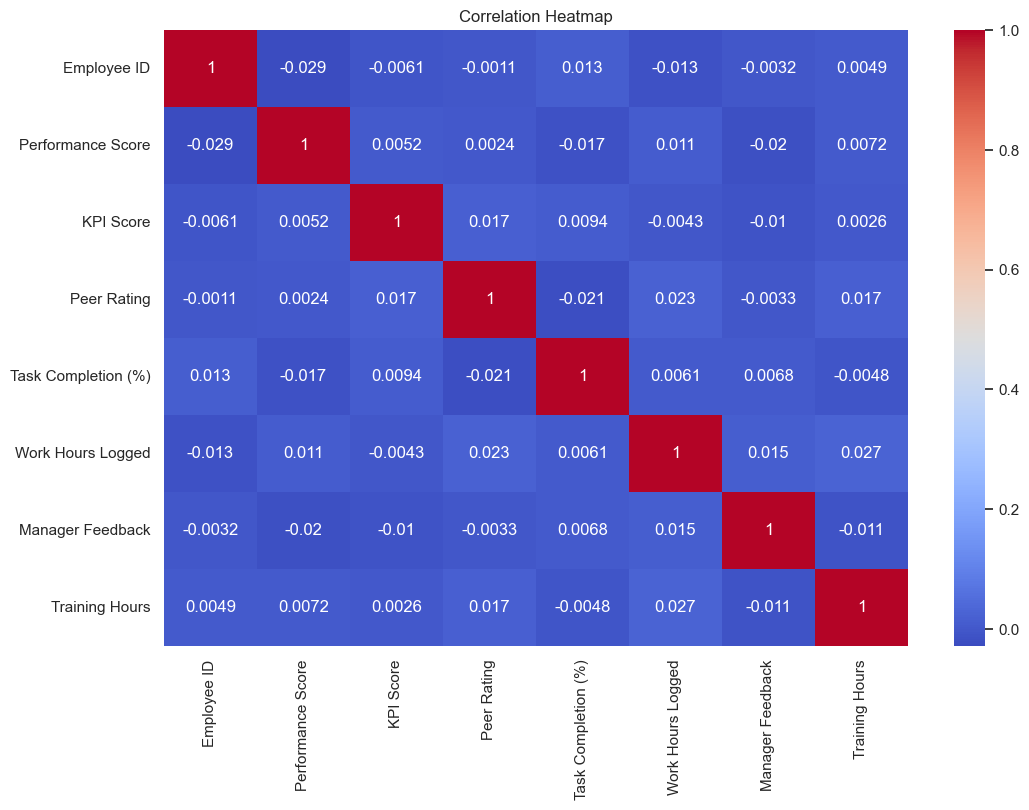

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

### No.of Employees Eligible For Promotion

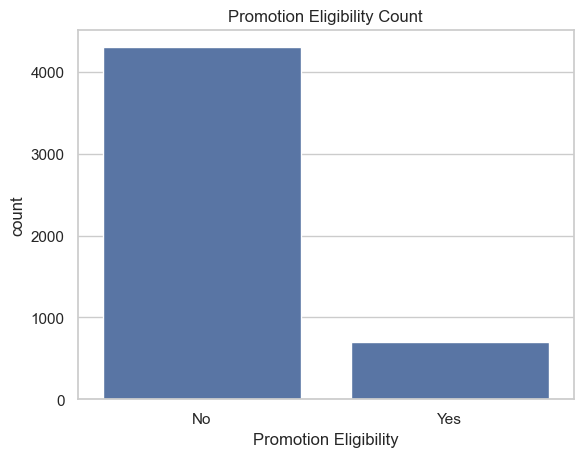

In [19]:
print(df.columns)
sns.countplot(x='Promotion Eligibility', data=df)
plt.title('Promotion Eligibility Count')
plt.show()


#### Count the number of employees in each department:

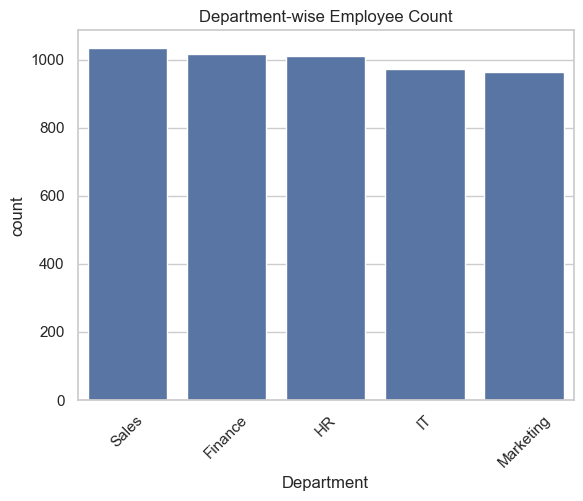

In [20]:
sns.countplot(x='Department', data=df)
plt.title('Department-wise Employee Count')
plt.xticks(rotation=45)
plt.show()


### 📈 Feature Distributions

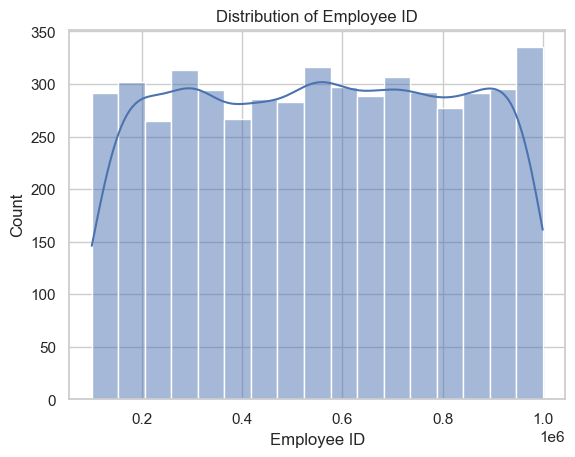

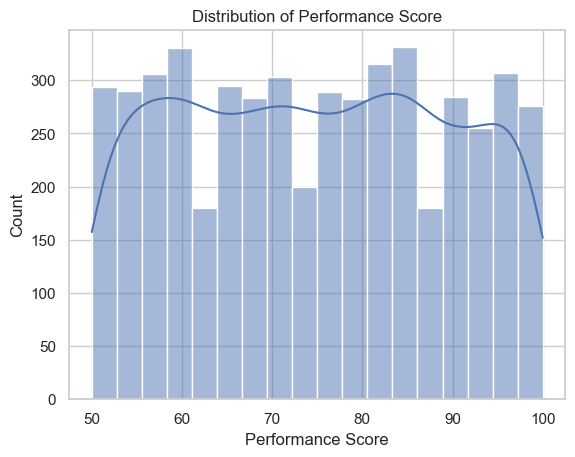

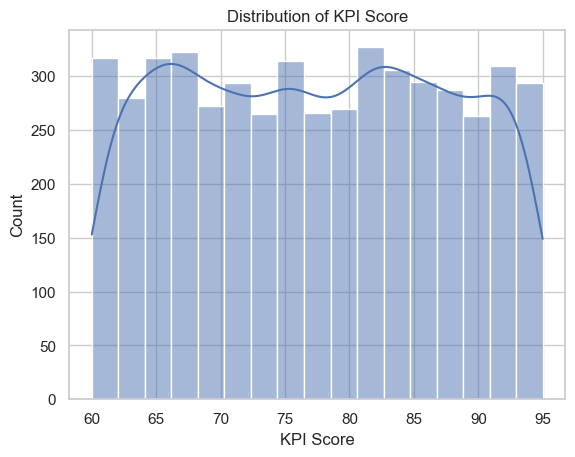

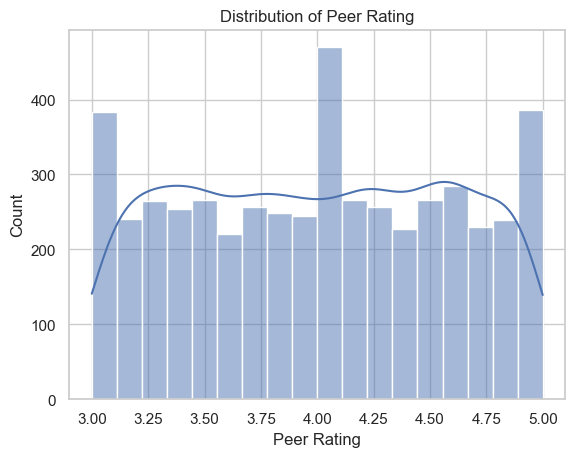

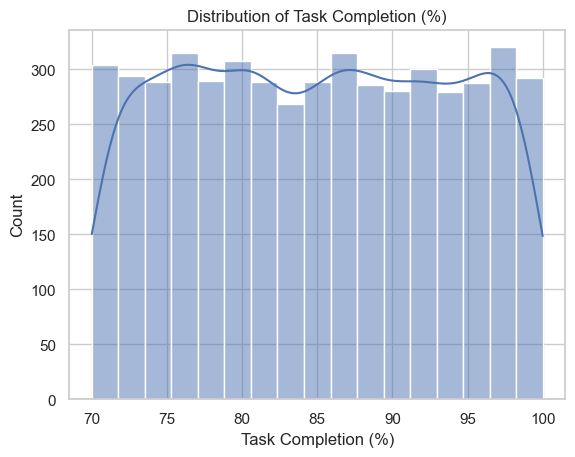

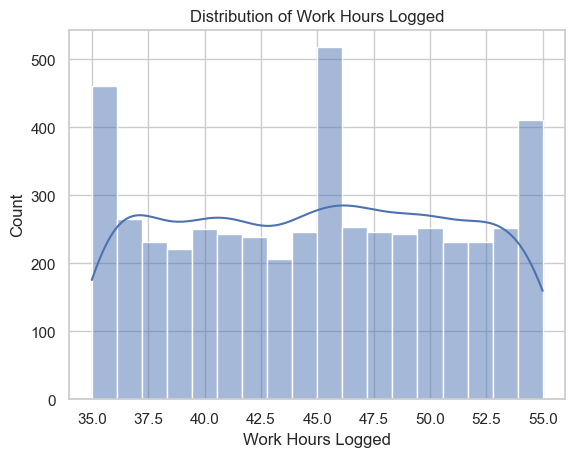

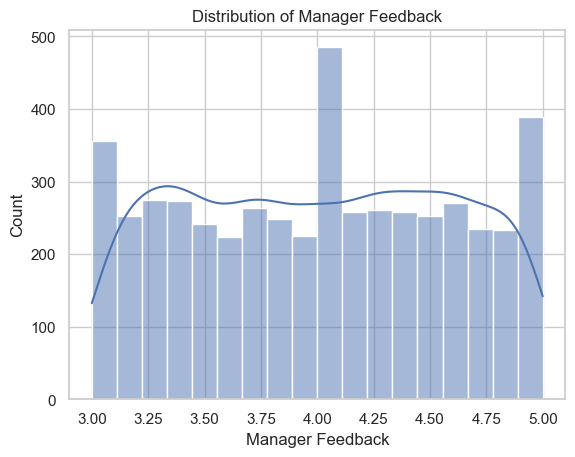

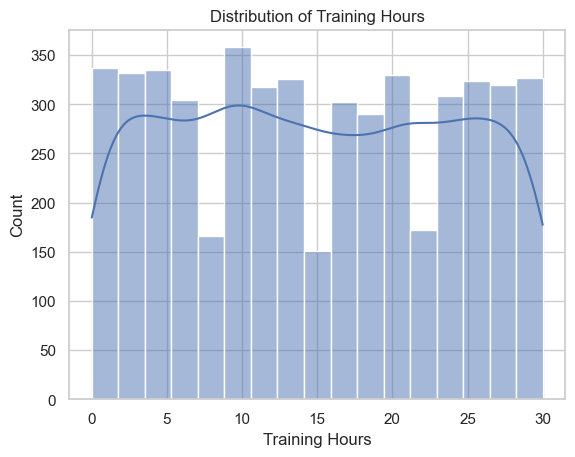

In [21]:
for col in df.select_dtypes(include='number').columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

###  Grouped Statistics 

In [24]:
grouped_df = df.groupby('Department')['KPI Score'].mean().reset_index()
print(grouped_df)


  Department  KPI Score
0    Finance  77.392628
1         HR  77.664614
2         IT  77.445390
3  Marketing  76.904415
4      Sales  77.495884


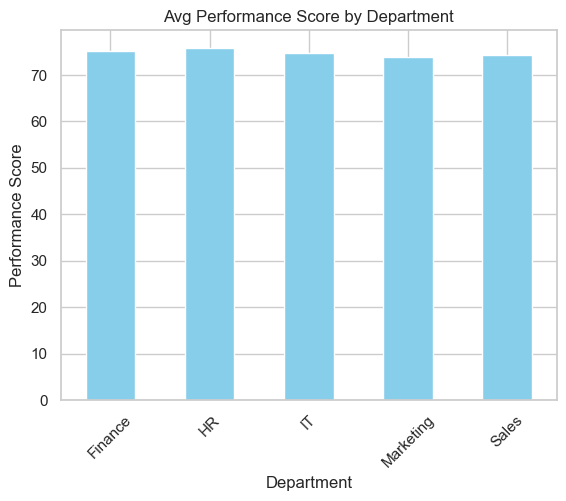

In [25]:
df.groupby('Department')['Performance Score'].mean().plot(kind='bar', color='skyblue')
plt.title('Avg Performance Score by Department')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.show()


### 🧪 Outlier Detection Using Boxplots

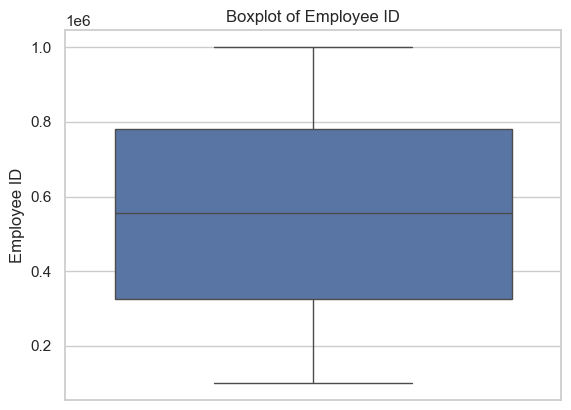

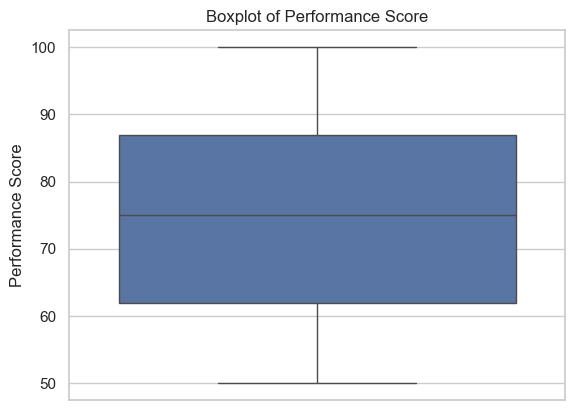

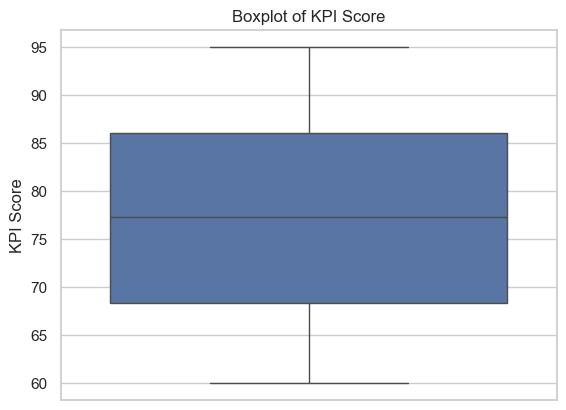

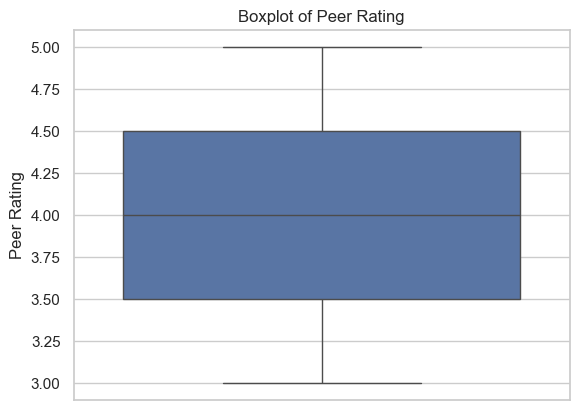

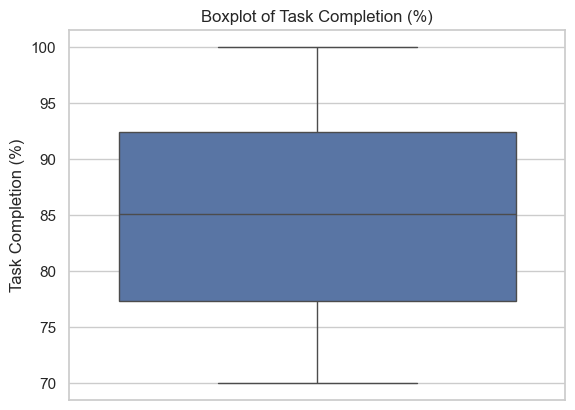

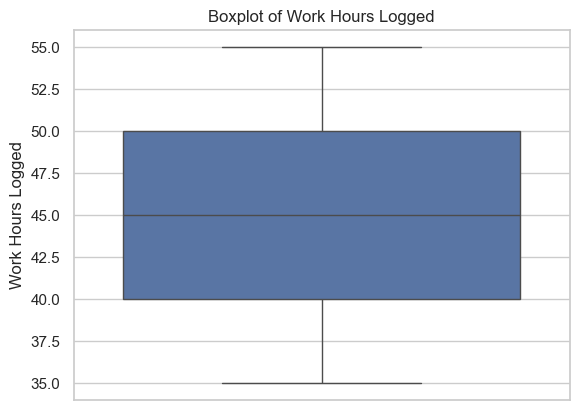

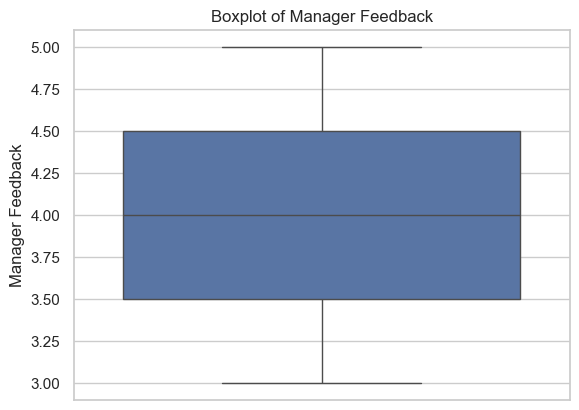

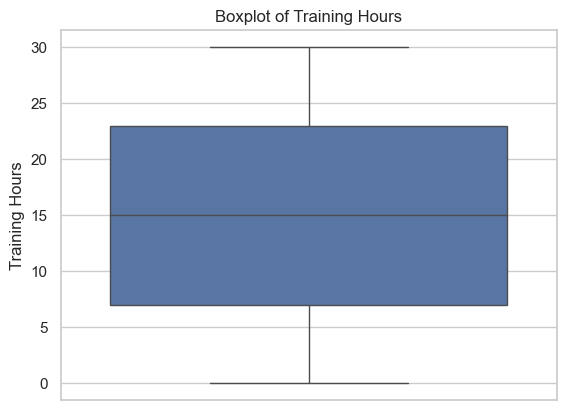

In [26]:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()